# The Hamiltonian Nullspace Shuttle

This notebook implements the Hamiltonian Nullspace Shuttle in its pure form for an analytically defined, one-dimensional misfit functi

## 1. Import Python packages

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## 2. Set basic input parameters

In [135]:
# Initial model.
m_init=0.1

# Probabilistic tolerance.
epsilon=1.5

# Coordinate lines in model and momentum space.
delta=0.1
m_line=np.arange(-15.1,15.1,delta)
p_line=np.arange(-4.1,4.1,delta)

# Leapfrog parameters (number of steps and step length).
nt_total=400
nt_segment=20
dt=0.1

# Misfit function.
function='cycleskip2'

## 3. Define analytic kinetic energy and its derivative.

In [136]:
def U(m,function='cycleskip'):
    
    if function=='cycleskip':
        return 1.0-np.cos(m)+0.025*m**2
    
    if function=='cycleskip2':
        return 1.0-np.cos(0.2*m**2)+0.025*m**2
        

def dU(m,function='cycleskip'):
    
    if function=='cycleskip':
        return np.sin(m)+0.05*m
    
    if function=='cycleskip2':
        return 0.2*2.0*m*np.sin(0.2*m**2)+0.05*m

## 4. Leapfrog time stepping.

In [154]:
# Initial model and momentum.
m=np.zeros(nt_total)
p=np.zeros(nt_total)
m[0]=m_init
p[0]=epsilon*np.random.randn()

# Time stepping.
for n in range(nt_total-1):
    
    p_half=p[n]-0.5*dt*dU(m[n],function)
    m[n+1]=m[n]+dt*p_half
    p[n+1]=p_half-0.5*dt*dU(m[n+1],function)
    
    if np.remainder(n+1,nt_segment)==0.0:
        p[n+1]=epsilon*np.random.randn()

## 5. Plotting.

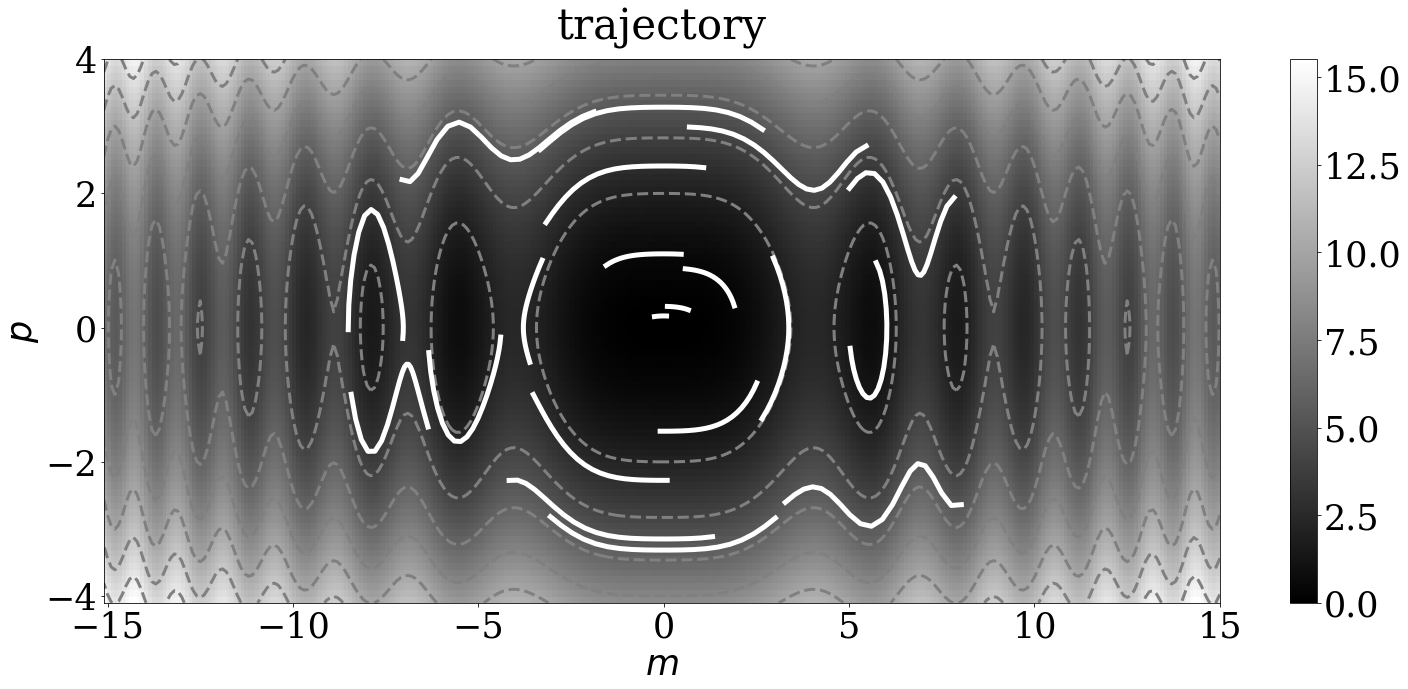

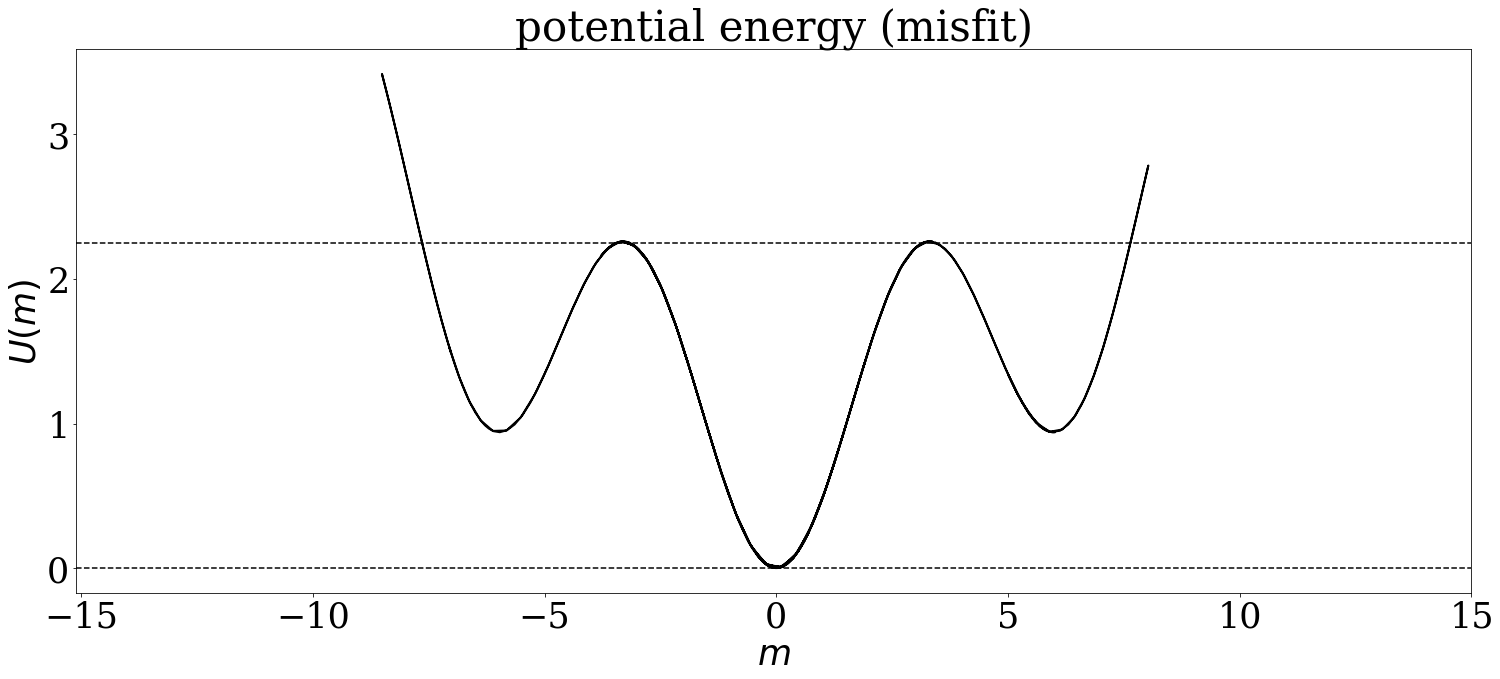

In [155]:
# Set some plotting options.
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 35})

# Plot Hamiltonian surface with superimposed trajectory.
M,P=np.meshgrid(m_line,p_line)
H=0.5*P*P+U(M,function)

plt.subplots(1, figsize=(25,10))
plt.pcolor(M,P,H,cmap=cm.gray)
plt.colorbar()
plt.contour(M,P,H,colors='grey',linewidths=3,linestyles='dashed')

for k in range(int(np.floor(nt_total/nt_segment))):
    plt.plot(m[k*nt_segment:(k+1)*nt_segment],p[k*nt_segment:(k+1)*nt_segment],'w',linewidth=5)

plt.xlabel(r'$m$')
plt.ylabel(r'$p$')
plt.title('trajectory',pad=20)
plt.show()

# Plot potential energy sampled by the shuttle.
U_init=U(m_init,function)

plt.subplots(1, figsize=(25,10))
plt.plot(m,U(m),'k',linewidth=2)
plt.plot([m_line[0],m_line[-1]],[U_init,U_init],'k--')
plt.plot([m_line[0],m_line[-1]],[U_init+epsilon**2.0,U_init+epsilon**2.0],'k--')
plt.xlim([m_line[0],m_line[-1]])
plt.xlabel(r'$m$')
plt.ylabel(r'$U(m)$')
plt.title('potential energy (misfit)')
plt.show()


In [147]:
print([1,2])

[1, 2]
